**Business Understanding**
*   Tujuan : Membantu perusahaan pelayaran atau pihak terkait memahami faktor


*   List item



In [2]:
#install tensorflow
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [4]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1xtMwmPzze24OM9teLuqp0QEurUD-tVko')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


2. Pra-pemrosesan Data

pada tahap ini, kita akan memisahkan fitur (x) dan target (y),melakukan pembagian data menjadi data latih dan data uji, serata melakukan standarisasi fitur numerik agar model dapat belajar dengan optimal

In [7]:

#misal kolom target bernama 'Survived' dan fitur lain sudah bersih
X = df.drop('Survived', axis=1)
y = df['Survived']

#split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3. Membangun Arsitektur Neutral Network (2 Hidden Layer)

Pada tahap ini kita akan membangun model neural network dengan 2 hidden layer menggunakan keras, fungsi nya secara singkat

In [8]:
#membuat model neural network
model = Sequential()

#Input layer dan hidden layer pertama (16 neuron, aktivasi relu)
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
#Hidden layer kedua(8 neuron, aktivasi relu)
model.add(Dense(8, activation='relu'))
#Output layer (1 neuron aktivasi, sigmoid untuk klasifikasi biner)
model.add(Dense(1, activation='sigmoid'))

#menampilkan ringkasan arsitektur model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

4. Kompilasi dan training model

Selanjutnya model di kompilasi dengan lost function and optimizer yang sesuai, lalu dilakukan proses training(pelatihan) menggunakan data latih

In [9]:
#kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
#Training model
history = model.fit(X_train,y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6673 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6425 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6188 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6093 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6573 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6372 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6584 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6751 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

5. Evaluasi model
Setelah semua model dilatih, kita akan mengevaluasi perfoma model pada data uji untuk melihat seberapa baik model melakukan prediksi

In [11]:
#Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss pada data uji: (loss:.sf)')
print(f'Accuracy pada data uji: (accuracy:.2f)')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5906 - loss: nan
Loss pada data uji: (loss:.sf)
Accuracy pada data uji: (accuracy:.2f)


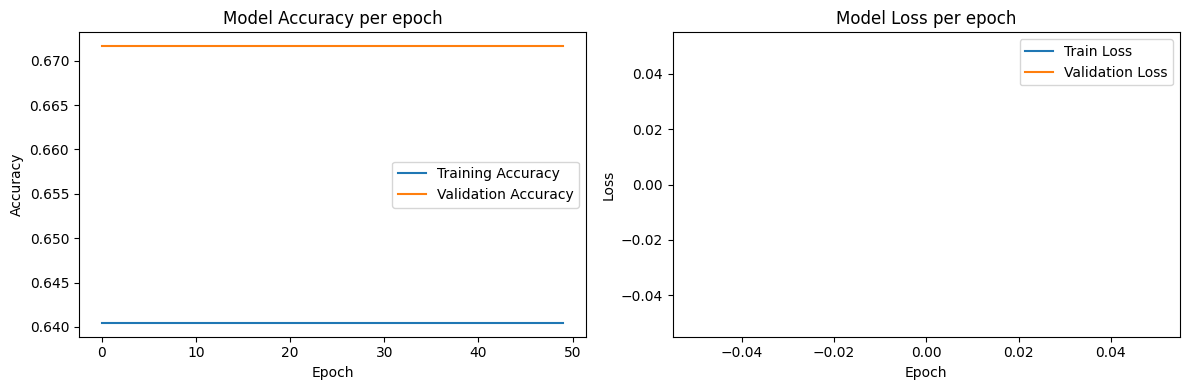

In [12]:
plt.figure(figsize=(12, 4))

# Visualisasi Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()